# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas


URL = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

response = requests.get(URL)

if response.status_code == 200:
  html_parseado = BeautifulSoup(response.text, "html.parser")


##html_parseado.find("div")

p_response = pandas.read_html(URL)
contador = 0
for tabla in p_response:
  tabla_limpia = tabla.dropna(how='all')  
  tabla_limpia = tabla_limpia.dropna(axis=1, how='all')  
  ##if not tabla_limpia.empty:
    ##print(tabla_limpia.replace("B", "", regex=True).replace("$", "", regex=True))
  ##print(tabla_limpia.head(10))




                                Song_Artist  Streams (billions)
0            "Blinding Lights" - The Weeknd               4.894
1               "Shape of You" - Ed Sheeran               4.418
2      "Starboy" - The Weeknd and Daft Punk               3.952
3       "Someone You Loved" - Lewis Capaldi               3.945
4                "As It Was" - Harry Styles               3.932
5    "Sunflower" - Post Malone and Swae Lee               3.857
6     "Sweater Weather" - The Neighbourhood               3.847
7  "One Dance" - Drake with Wizkid and Kyla               3.677
8  "Stay" - The Kid Laroi and Justin Bieber               3.581
9                    "Perfect" - Ed Sheeran               3.489


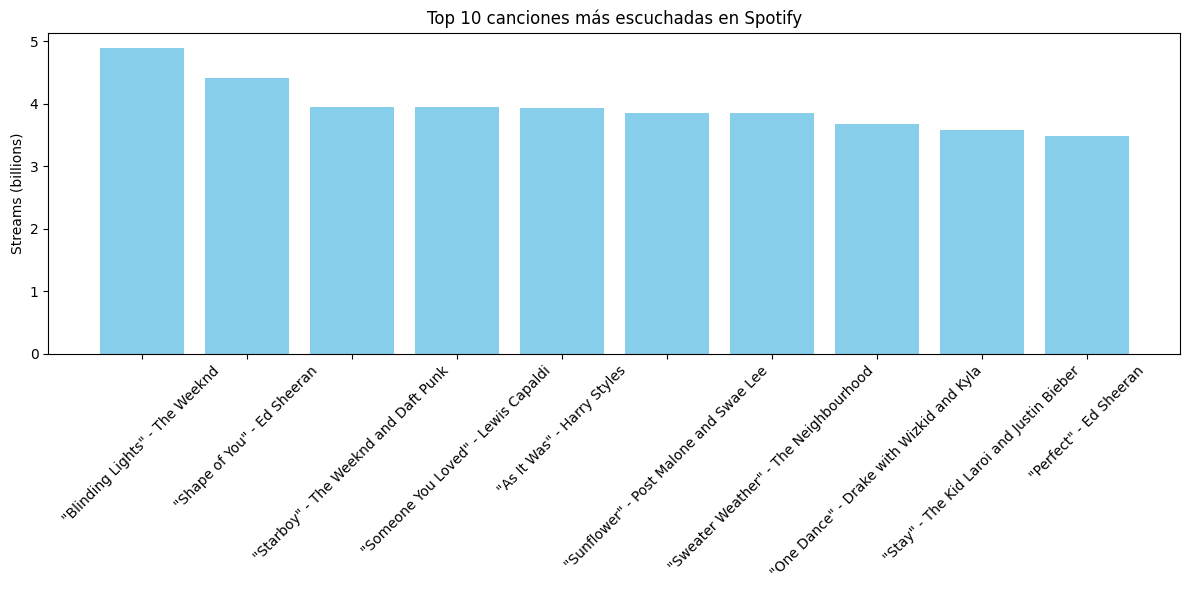

In [37]:
top_songs = p_response[0].head(10).copy()
top_songs['Streams (billions)'] = pandas.to_numeric(top_songs['Streams (billions)'], errors='coerce')
top_songs['Song_Artist'] = top_songs['Song'] + " - " + top_songs['Artist(s)']
print(top_songs[['Song_Artist', 'Streams (billions)']].head(10))

plt.figure(figsize=(12, 6))
plt.bar(top_songs['Song_Artist'], top_songs['Streams (billions)'], color='skyblue')
plt.title("Top 10 canciones más escuchadas en Spotify")
plt.ylabel("Streams (billions)")
plt.xticks(rotation=45,)
plt.tight_layout()
plt.show()

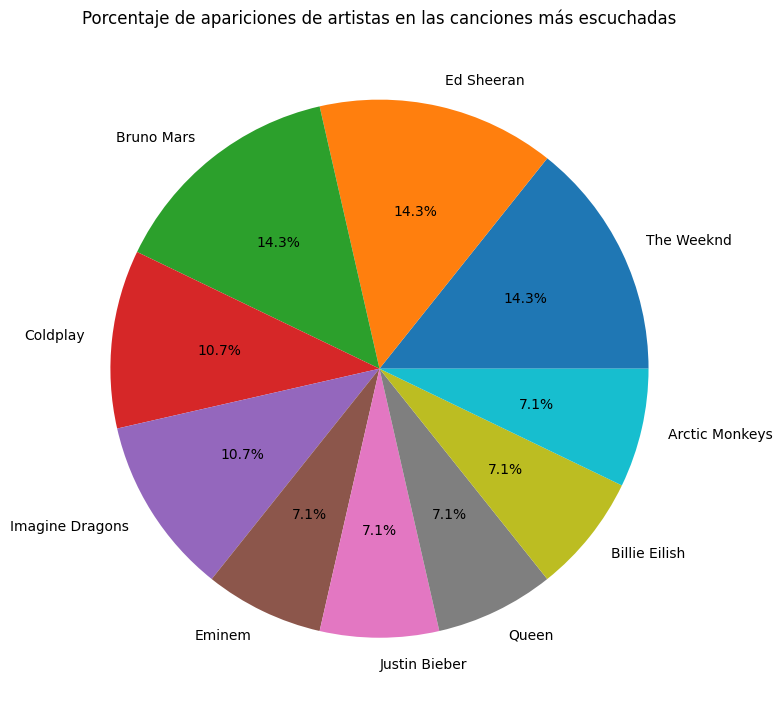

In [4]:
conteo_artistas = p_response[0]['Artist(s)'].value_counts()
porcentaje_artistas = conteo_artistas / conteo_artistas.sum() * 100

top_canciones_artistas = porcentaje_artistas.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_canciones_artistas, labels=top_canciones_artistas.index, autopct='%1.1f%%')
plt.title("Porcentaje de apariciones de artistas en las canciones más escuchadas")
plt.tight_layout()
plt.show()

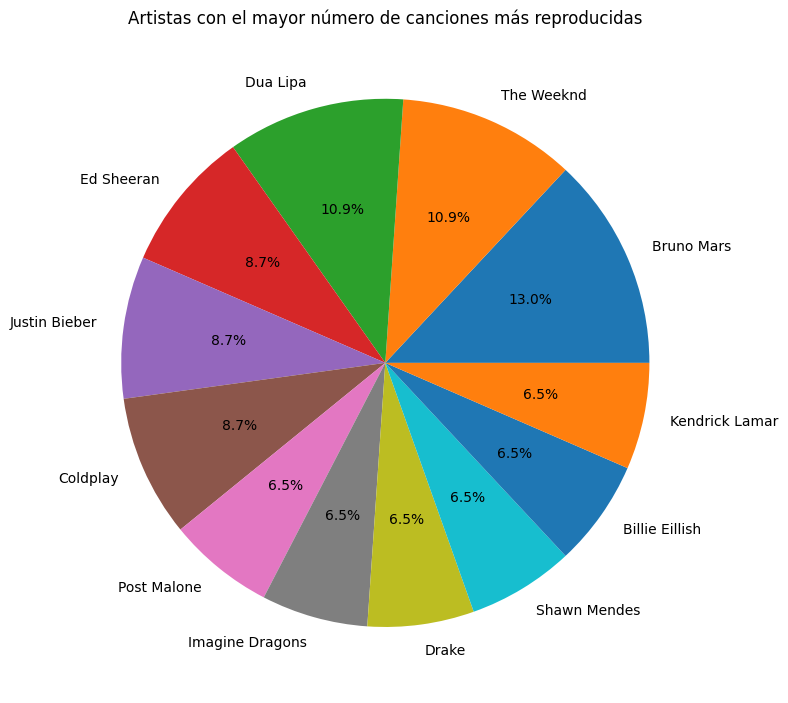

In [5]:
top_artistas = p_response[1].head(12)
artistas = top_artistas['Artist'].iloc[:, 0]
data = pandas.to_numeric(top_artistas[('Top 100', 'Total songs')], errors='coerce')
porcentaje_canciones = data / data.sum() * 100

informacion = pandas.DataFrame({
    'Artist': artistas,
    'Porcentaje': porcentaje_canciones
})


plt.figure(figsize=(8, 8))
plt.pie(informacion['Porcentaje'], labels=informacion['Artist'], autopct='%1.1f%%')
plt.title("Artistas con el mayor número de canciones más reproducidas")
plt.tight_layout()
plt.show()

In [24]:

df = p_response[5]
df['Year'] = df['Year'].squeeze().astype(str).str.replace(r"\[.*?\]", "", regex=True).str.strip()

df

Year                            Artist and Song ranking  \
    Year                                                  1   
0   2024        Sabrina Carpenter "Espresso" (1.8 billion)"   
1   2023                Miley Cyrus "Flowers" (1.9 billion)   
2   2022             Harry Styles "As It Was" (1.7 billion)   
3   2021     Olivia Rodrigo "Drivers License" (1.4 billion)   
4   2020         The Weeknd "Blinding Lights" (1.6 billion)   
5   2019  Shawn Mendes & Camila Cabello "Señorita" (1. 2...   
6   2018                   Drake "God's Plan" (1.1 billion)   
7   2017            Ed Sheeran "Shape of You" (1.5 billion)   
8   2016  Drake "One Dance" (feat. Wizkid and Kyla) (960...   
9   2015  Major Lazer "Lean On" (feat. MØ & DJ Snake) (5...   
10  2014            Pharrell Williams "Happy" (260 million)   
11  2013  Macklemore & Ryan Lewis "Can't Hold Us" (feat....   
12  2012  Gotye "Somebody That I Used To Know" (feat. Ki...   

                                                       \
                                                    2   
0                     Benson Boone "Beautiful Things"   
1                                     SZA "Kill Bill"   
2                          Glass Animals "Heat Waves"   
3          Lil Nas X "Montero (Call Me By Your Name)"   
4                          Tones and I "Dance Monkey"   
5                             Billie Eilish "Bad Guy"   
6                                 XXXTentacion "Sad!"   
7   Luis Fonsi, Daddy Yankee & Justin Bieber "Desp...   
8   Mike Posner "I Took A Pill in Ibiza – Seeb Remix"   
9    Omi "Cheerleader – Felix Jaehn Remix Radio Edit"   
10       Clean Bandit "Rather Be" (feat. Jess Glynne)   
11                                Avicii "Wake Me Up"   
12                   Carly Rae Jepsen "Call Me Maybe"   

                                                       \
                                                    3   
0                  Billie Eilish "Birds of a Feather"   
1                            Harry Styles "As It Was"   
2           The Kid Laroi "Stay (with Justin Bieber)"   
3           The Kid Laroi "Stay (with Justin Bieber)"   
4                               Roddy Ricch "The Box"   
5                  Post Malone & Swae Lee "Sunflower"   
6            Post Malone "Rockstar (feat. 21 Savage)"   
7               Luis Fonsi & Daddy Yankee "Despacito"   
8   The Chainsmokers "Don't Let Me Down" (feat. Daya)   
9        Mark Ronson "Uptown Funk" (feat. Bruno Mars)   
10                             Calvin Harris "Summer"   
11  Macklemore & Ryan Lewis "Thrift Shop" (feat. W...   
12          Fun. "We Are Young" (feat. Janelle Monáe)   

                                                       \
                                                    4   
0                  FloyyMenor and Cris MJ "Gata Only"   
1                     Jung Kook "Seven" (feat. Latto)   
2   Bad Bunny feat. Chencho Corleone "Me Porto Bon...   
3                           Olivia Rodrigo "Good 4 U"   
4         Imanbek & Saint Jhn "Roses – Imanbek Remix"   
5                             Ariana Grande "7 Rings"   
6          Post Malone "Psycho (feat. Ty Dolla $ign)"   
7   The Chainsmokers "Something Just Like This" (w...   
8                        Rihanna "Work" (feat. Drake)   
9    Wiz Khalifa "See You Again" (feat. Charlie Puth)   
10            Katy Perry "Dark Horse" (feat. Juicy J)   
11  Daft Punk "Get Lucky" (feat. Pharrell Williams...   
12                                 Flo Rida "Whistle"   

                                                       
                                                    5  
0                          Teddy Swims "Lose Control"  
1        Eslabon Armado, Peso Pluma "Ella Baila Sola"  
2                        Bad Bunny "Tití Me Preguntó"  
3                Dua Lipa "Levitating" (feat. DaBaby)  
4                          Dua Lipa "Don't Start Now"  
5   Lil Nas X & Billy Ray Cyrus "Old Town Road – R...  
6                              Drake "In M

                                         Song_Artist   Streams
0   "All I Want For Christmas Is You" - Mariah Carey  24863570
1                           "Last Christmas" - Wham!  24556791
2   "Rockin' Around the Christmas Tree" - Brenda Lee  21635497
3                   "Jingle Bell Rock" - Bobby Helms  18917096
4                    "Santa Tell Me" - Ariana Grande  15074202
5  "It's Beginning to Look a Lot Like Christmas" ...  14790986
6             "Underneath the Tree" - Kelly Clarkson  14543628
7  "Let It Snow! Let It Snow! Let It Snow!" - Dea...  14324413
8  "It's the Most Wonderful Time of the Year" - A...  13789130
9                   "Feliz Navidad" - José Feliciano  12993457


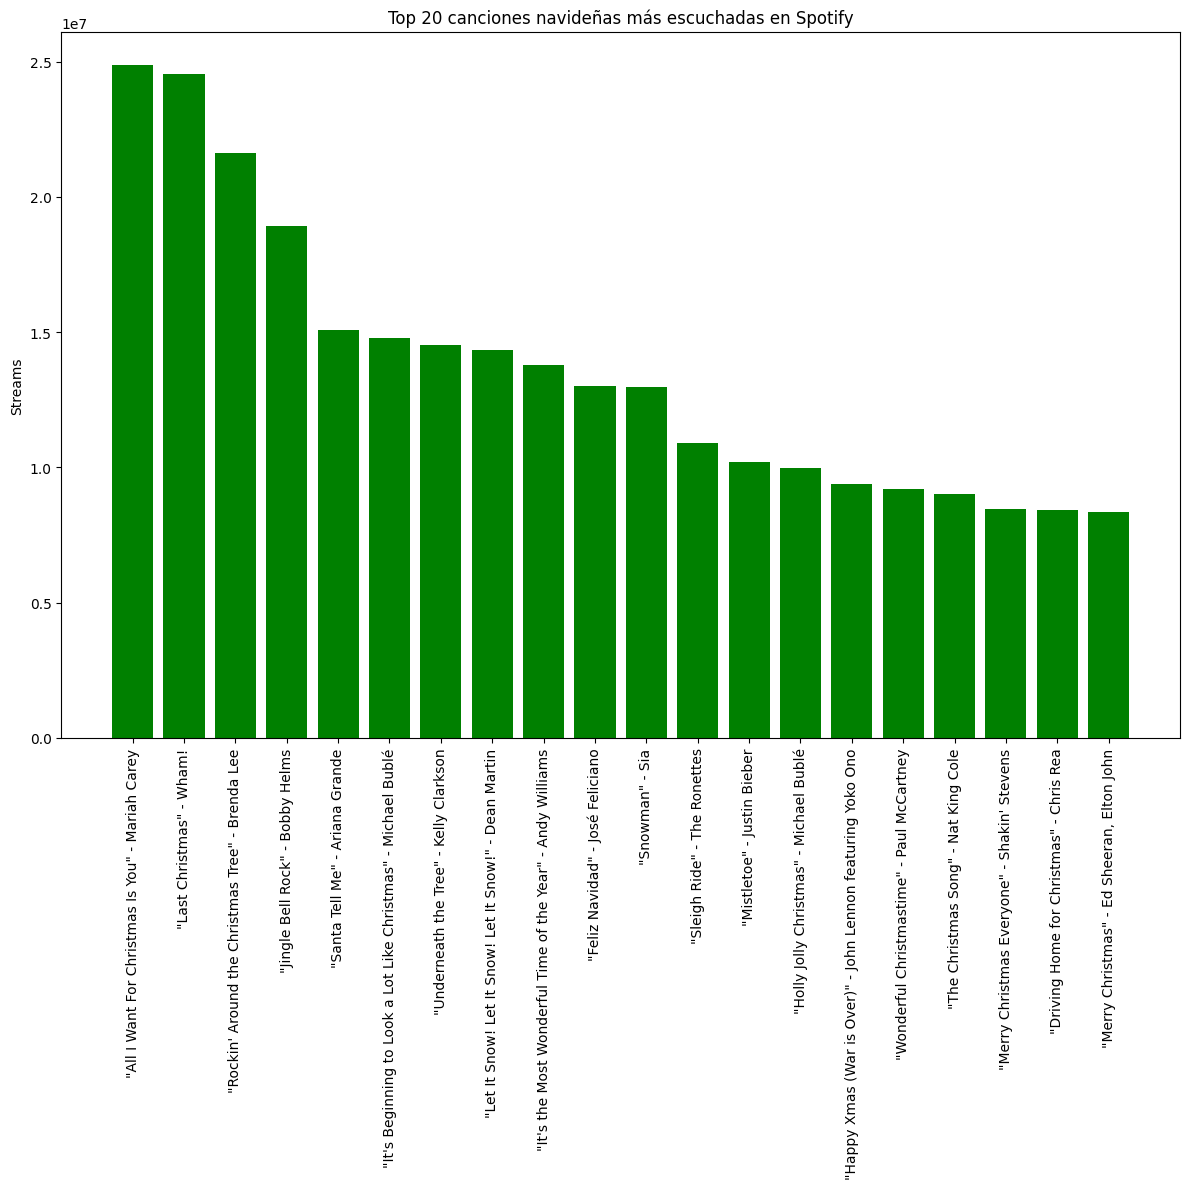

In [ ]:
christmas_songs = p_response[8].head(20).copy()

christmas_songs['Streams'] = pandas.to_numeric(christmas_songs['Streams'], errors='coerce')
christmas_songs['Song_Artist'] = christmas_songs['Song'] + " - " + christmas_songs['Artist(s)']
print(christmas_songs[['Song_Artist', 'Streams']].head(10))

plt.figure(figsize=(12, 12))
plt.bar(christmas_songs['Song_Artist'], christmas_songs['Streams'], color='green')
plt.title("Top 20 canciones navideñas más escuchadas en Spotify")
plt.ylabel("Streams")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

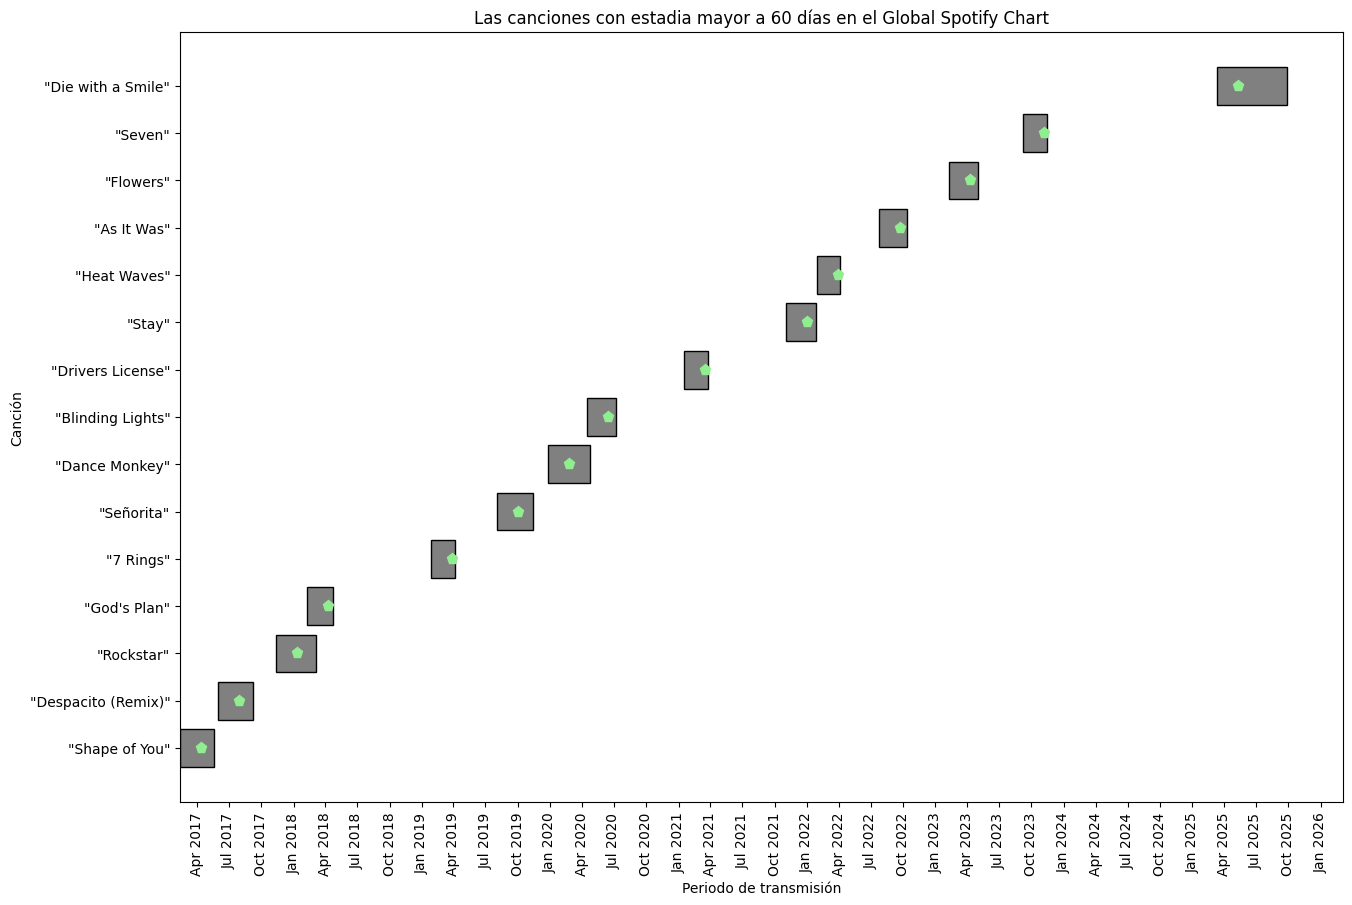

In [ ]:
import matplotlib.dates as mdates

df = p_response[14].copy()
df = df.drop(10) # Demasiada información, solo quito esta canción
df['Date achieved'] = pandas.to_datetime(df['Date achieved'])

df['Start'] = df['Date achieved'] - pandas.to_timedelta(60, unit='D')

df = df.sort_values('Date achieved')

fig, ax = plt.subplots(figsize=(15, 10))

for i, row in df.iterrows():
    ax.barh(row['Song'], row['Days at No. 1'], left=row['Start'], color='gray', edgecolor='black')
    ##Fecha en la que se logró los 60 dias en el primer lugar
    ax.plot(row['Date achieved'], row['Song'], 'p', color='lightgreen', markersize=8, label='Date achieved' if i == 0 else "")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.set_xlabel("Periodo de transmisión")
ax.set_ylabel("Canción")
ax.set_title("Las canciones con estadia mayor a 60 días en el Global Spotify Chart")
plt.xticks(rotation=90)
plt.show()